# **Aprendizaje no supervisado**

## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Vamos a leer y realizar una exploración inicial de nuestros datos


In [ ]:
df = pd.read_csv('/content/wine1.csv')
df.head(180)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


#### Estadisticas básicas

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.060950,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,2.312081,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Boxplots

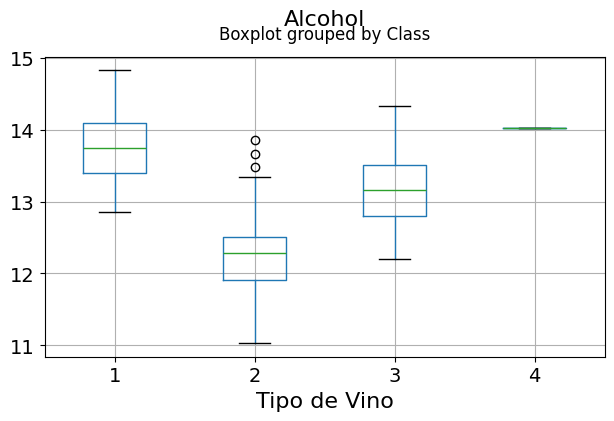

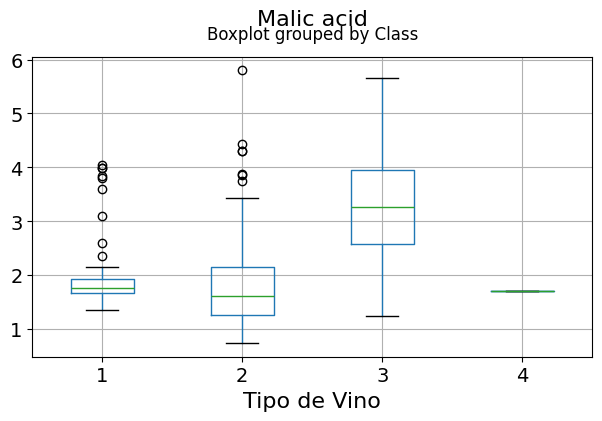

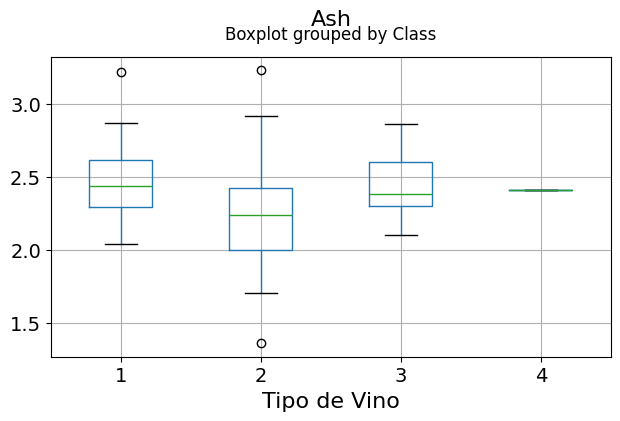

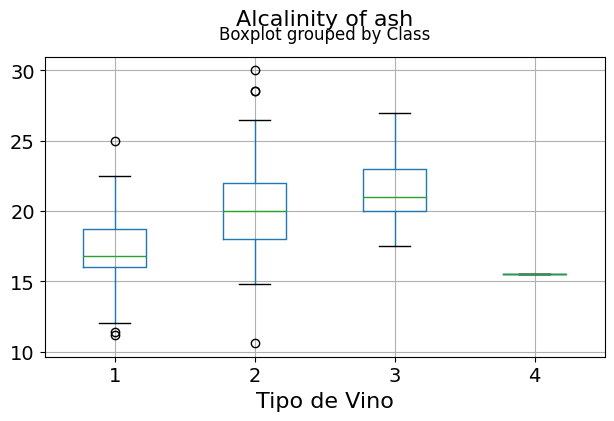

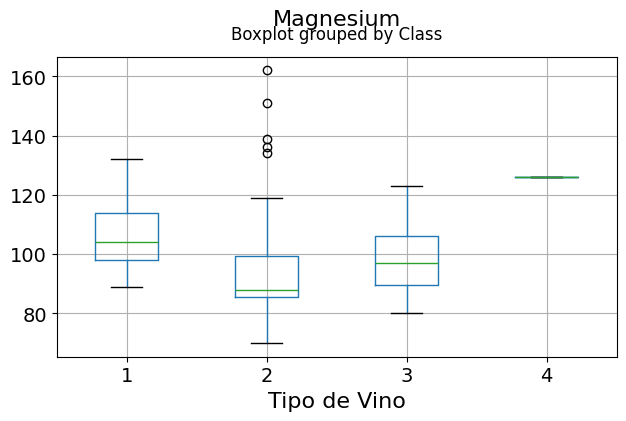

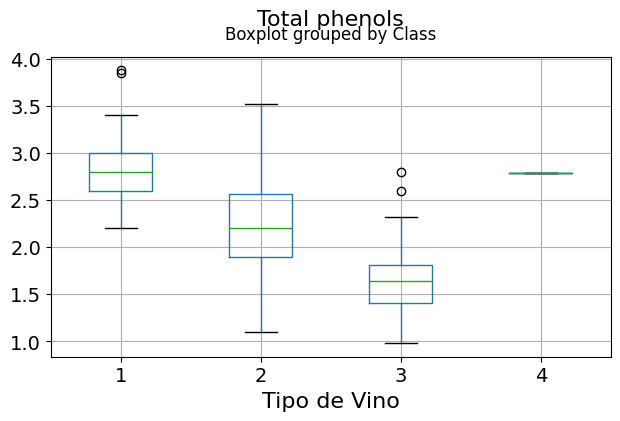

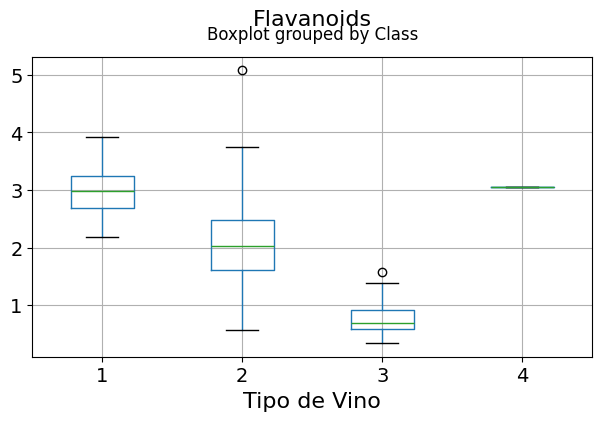

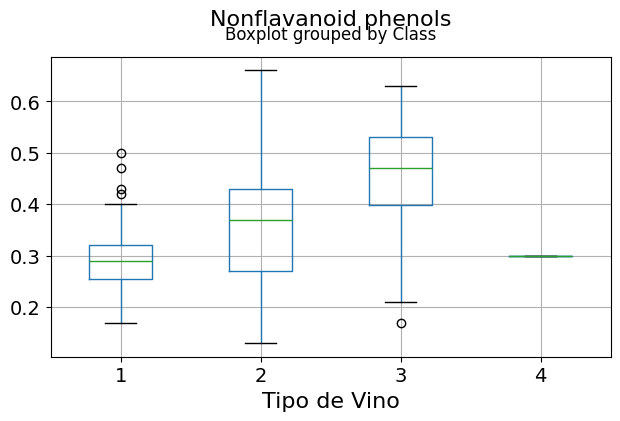

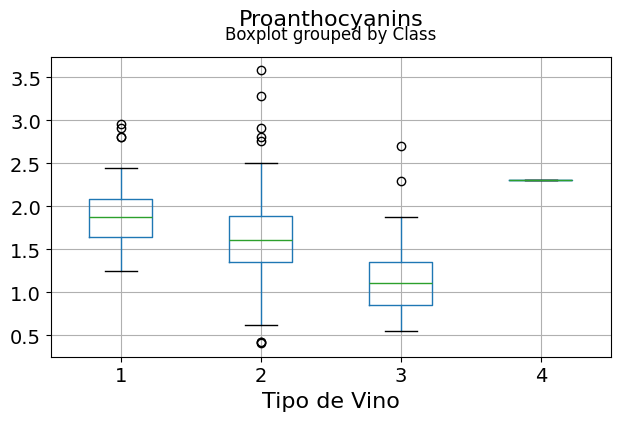

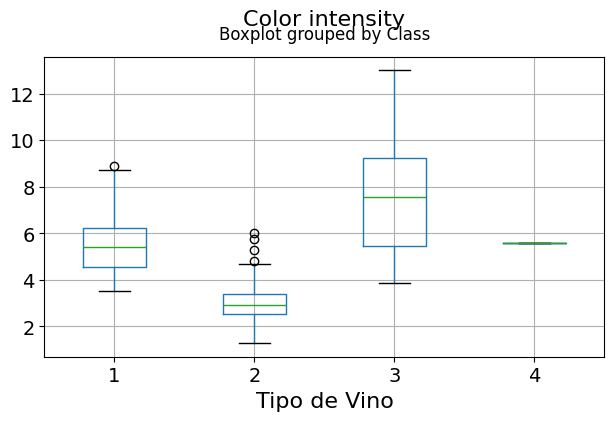

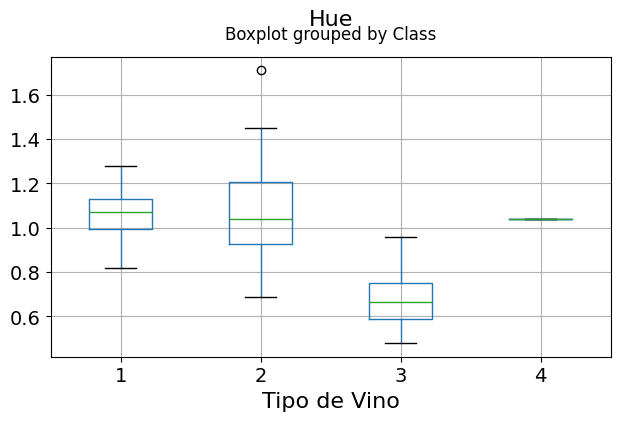

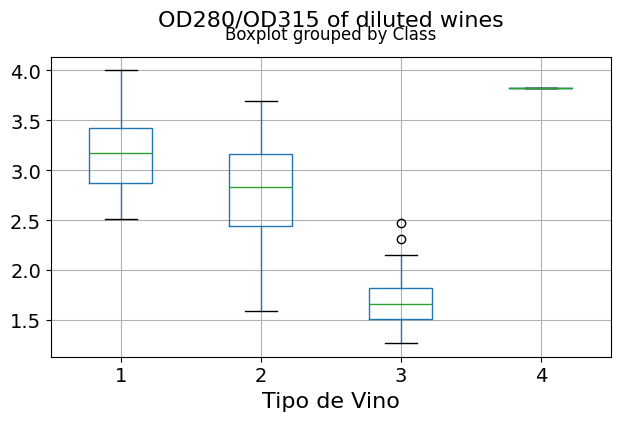

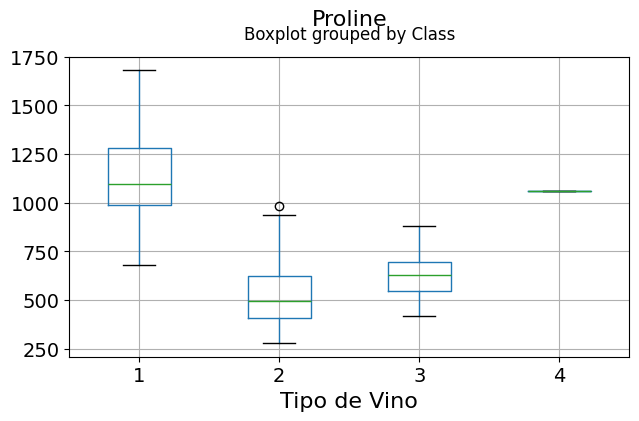

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Tipo de Vino", fontsize=16)

**Se puede ver que algunas características diferencian los tipos de vino de manera bastante clara**. Por ejemplo, la Alcalinidad, los Fenoles Totales o los Flavonoides producen diagramas de caja con medianas bien separadas, lo que indica claramente las clases de vino.

A continuación se muestra un ejemplo de separación de clases utilizando dos variables.

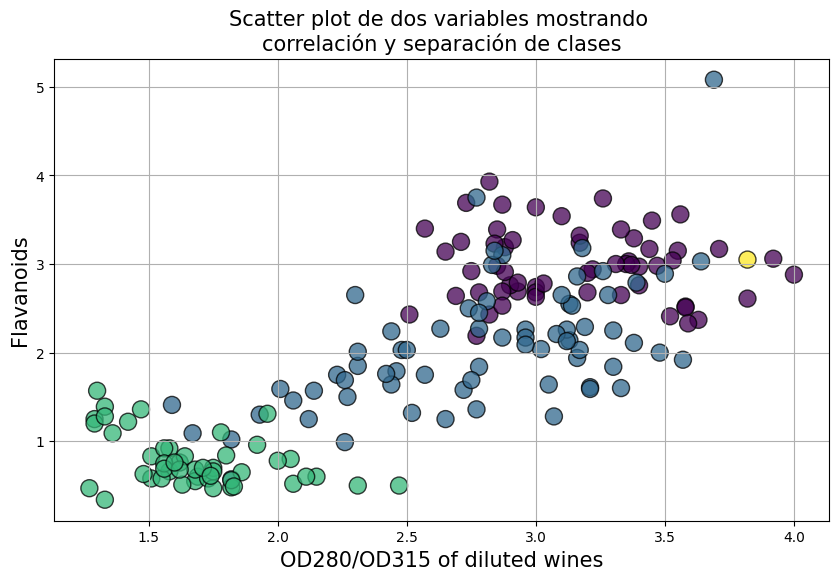

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Como sabes si todas las caracteristicas son independientes? *Una matrix de covariance*

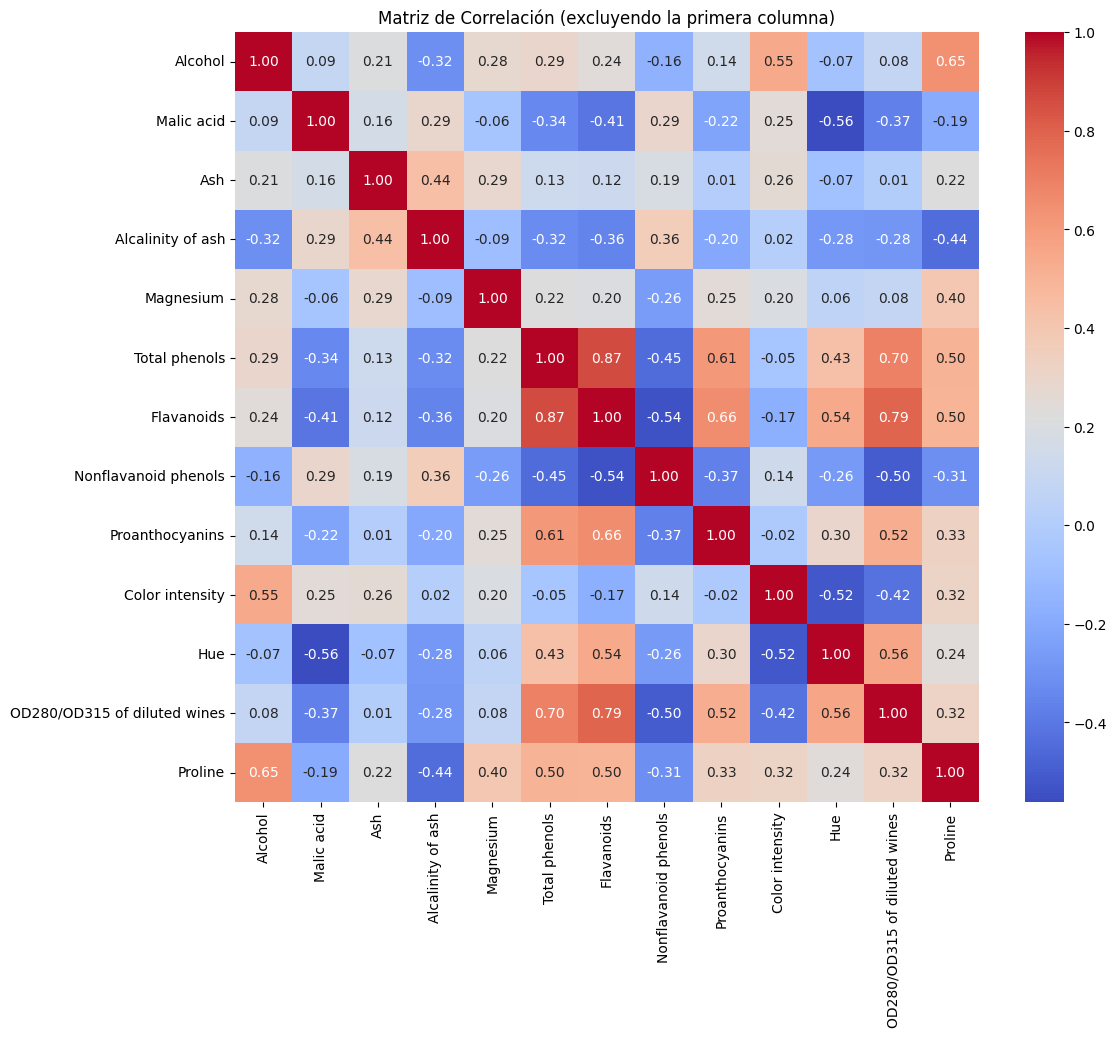

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()


Interpretación: Se puede observar que existe una buena correlación entre varias características, es decir, no son independientes entre sí, es decir, existe redundancia de información.

## Análisis de componentes principales


In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


<ipython-input-10-4c3ec7613a18>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)


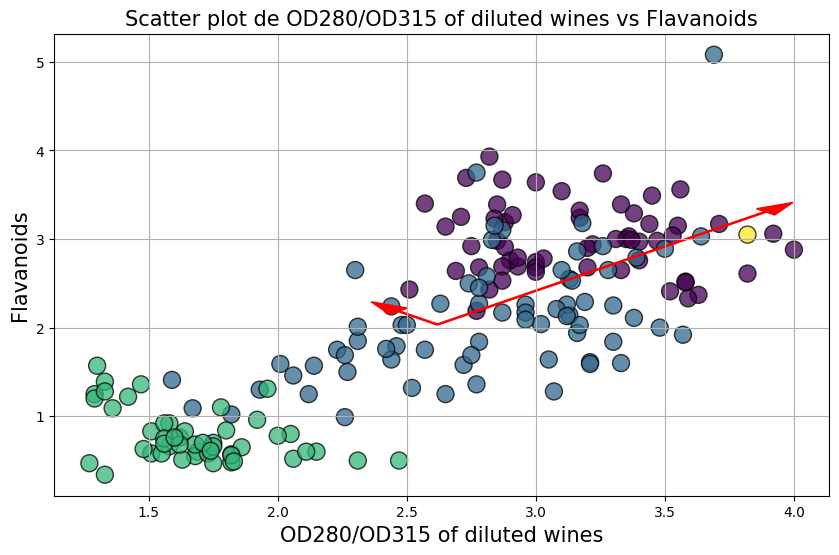

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centroide = np.mean(nuevo_df, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['OD280/OD315 of diluted wines'],nuevo_df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Scatter plot de OD280/OD315 of diluted wines vs Flavanoids", fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines", fontsize=15)
plt.ylabel("Flavanoids", fontsize=15)

for i in range(pca.n_componentes):
  vector = pca.vectores_propios[:, i] * pca.valores_propios[i]
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)

plt.show()

### Normalización de datos
Recuerde que PCA requiere escalamiento/normalización de los datos para funcionar correctamente (eliminar la variabilidad de escala entre las caracteristicas)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.508949,-0.560183,0.231797,-1.161494,1.891074,0.805411,1.028967,-0.658164,1.216127,0.251148,0.361032,1.828723,1.007399
1,0.238781,-0.497226,-0.831151,-2.481160,0.007793,0.564809,0.727814,-0.819661,-0.550839,-0.295344,0.405012,1.098113,0.959632
2,0.189454,0.024419,1.111477,-0.261721,0.077545,0.805411,1.209658,-0.496668,2.125853,0.268497,0.317052,0.774959,1.389537
3,1.681593,-0.344330,0.488370,-0.801585,0.914558,2.489623,1.460619,-0.981157,1.023685,1.187992,-0.430614,1.168364,2.328959
4,0.288108,0.231278,1.844544,0.458096,1.263314,0.805411,0.657545,0.230064,0.393876,-0.321368,0.361032,0.437754,-0.043480
5,1.471954,-0.515213,0.305103,-1.281463,0.844807,1.559296,1.360235,-0.173676,0.656296,0.732582,0.405012,0.325352,2.233425
6,1.706257,-0.416281,0.305103,-1.461418,-0.271211,0.324207,0.486892,-0.496668,0.673791,0.081996,0.273071,1.351016,1.723908
7,1.299310,-0.164452,0.891557,-0.561646,1.472567,0.484609,0.476853,-0.415920,-0.603323,-0.004749,0.448993,1.351016,1.739830
8,2.248853,-0.623140,-0.721191,-1.641372,-0.201460,0.805411,0.948659,-0.577416,0.673791,0.060309,0.536953,0.325352,0.943710
9,1.052675,-0.883962,-0.354657,-1.041524,-0.131709,1.094133,1.119312,-1.142653,0.446360,0.936432,0.229091,1.308866,0.943710


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-1.786281e-15,-1.587805e-16,7.306384e-16,-2.381707e-16,-4.167988e-16,-3.572561e-16,1.190854e-16,-6.351220e-16,-1.984756e-16,2.480945e-16,-1.190854e-16,-6.351220e-16,7.939025e-17
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-2.437205e+00,-1.432588e+00,-3.690113e+00,-2.661114e+00,-2.084740e+00,-2.113890e+00,-1.701485e+00,-1.869386e+00,-2.072880e+00,-1.639888e+00,-2.101867e+00,-1.894579e+00,-1.498788e+00
25%,-7.909186e-01,-6.546183e-01,-5.745772e-01,-6.966114e-01,-8.292201e-01,-8.868211e-01,-8.281420e-01,-7.389126e-01,-6.033235e-01,-7.941268e-01,-7.604668e-01,-9.461904e-01,-7.886486e-01
50%,5.380492e-02,-4.252745e-01,-2.477685e-02,8.210212e-03,-1.317088e-01,9.964584e-02,1.054315e-01,-1.736760e-01,-6.098718e-02,-1.565525e-01,5.316953e-02,2.270009e-01,-2.345487e-01
75%,8.368698e-01,6.584872e-01,6.899636e-01,6.080584e-01,5.309268e-01,8.054108e-01,8.532942e-01,5.934307e-01,6.300542e-01,4.940334e-01,7.128747e-01,7.819836e-01,7.606020e-01
max,2.248853e+00,3.118311e+00,3.164065e+00,3.157413e+00,4.332363e+00,2.537743e+00,3.056728e+00,2.410262e+00,3.472946e+00,3.443356e+00,3.307715e+00,1.941125e+00,2.965856e+00


### Análisis de PCA

In [ ]:
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
porcentaje_explicacion_varianza = pca.valores_propios/np.sum(pca.valores_propios) * 100

#### Grafica explicando el % de de explicación de la varianza de cada componente

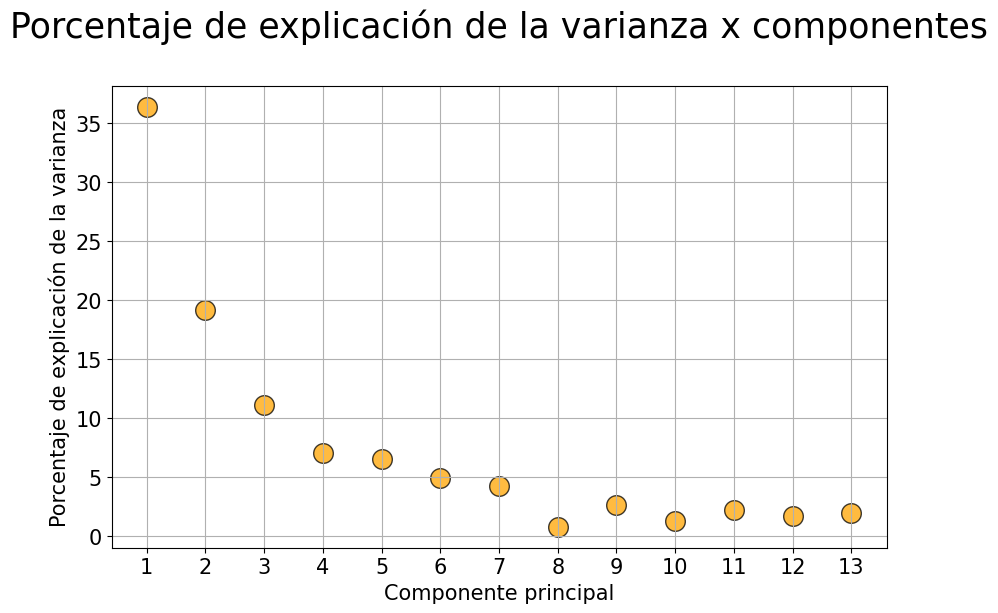

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(porcentaje_explicacion_varianza))],
            y=porcentaje_explicacion_varianza,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Porcentaje de explicación de la varianza x componentes\n",fontsize=25)
plt.xlabel("Componente principal",fontsize=15)
plt.xticks([i+1 for i in range(len(porcentaje_explicacion_varianza))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Porcentaje de explicación de la varianza",fontsize=15)
plt.show()

****La gráfica anterior indica que el primer componente principal explica aproximadamente el 36% de la varianza total de los datos y el segundo componente explica un 20% adicional. Por lo tanto, si solo consideramos los dos primeros componentes, juntos explican el 56 % de la varianza total.**

### Separación de tipos de vino utilizando solo los 2 mejores componentes

In [ ]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1
0,-3.312821,1.410403
1,-2.190739,-0.358144
2,-2.501594,1.006164
3,-3.756309,2.718077
4,-0.996828,0.853626
5,-3.048723,2.085505
6,-2.439261,1.150364
7,-2.055219,1.582926
8,-2.502308,0.885882
9,-2.739550,0.762037


#### Grafica de las dos columnas de este conjunto de datos transformados, con el color establecido en la etiqueta de clase de vino

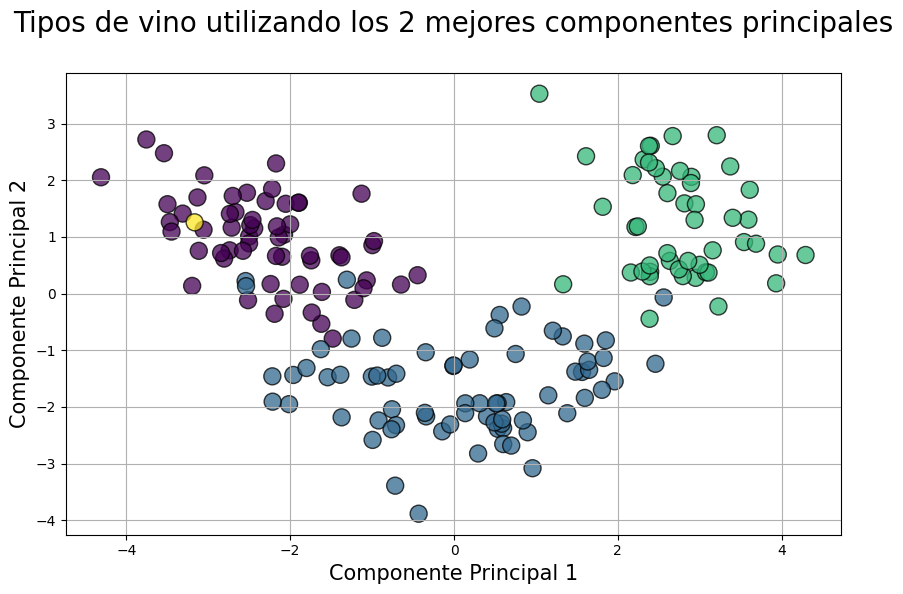

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

# **Taller**

1. La empresa Vinos Zungo SA ha liberado un nuevo tipo de vino a base de banano. Luego de llevarlo al laboratorio de analisis de alimento se determinó la siguiente composición para este número producto:

*   Alcohol = 14.03
*   Malic acid = 1.71
*   Ash = 2.41
*   Alcalinity of ash = 15.5
*   Magnesium = 126
*   Total phenols = 2.79
*   Flavanoids = 3.05
*   Nonflavanoid phenols = 0.3
*   Proanthocyanins = 2.3
*   Color intensity = 5.57
*   Hue = 1.04
*   D280/OD315 of diluted wines = 3.82
*   Proline = 1062

Dado los resultados de laboratorio, a cual tipo de vino pertenece?


#**Tips!**

*  Utilice solo los 3 mejores componentes para realizar su análisis.
*  Utilice kmean para realizar la asignación de tipos de vino

#**Preguntas de interpretación**
*  A cual tipo de vino pertenece?
*  Cambian los resultados si utiliza los 2 **mejores** componentes?
*  Cambian los resultados si utiliza los 5 **mejores** componentes?
*  Cambian los resultados si utiliza los 3 **peores** componentes?

<ipython-input-152-ccd9384dffb3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


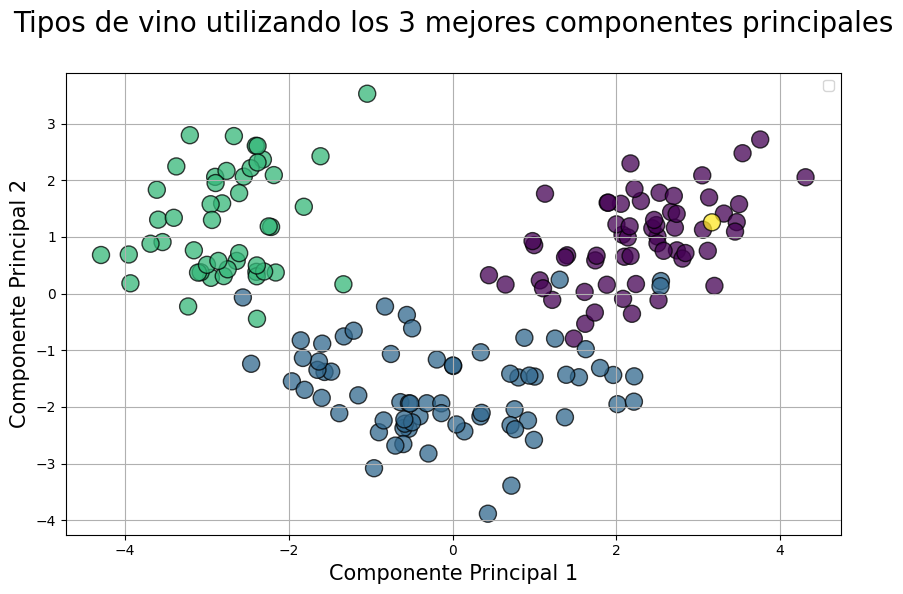

In [152]:
# 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Class'] = y

# usa la primera fila del dataset como nuevo vino
nuevo_vino = X.iloc[[0]]
nuevo_vino = scaler.transform(nuevo_vino)
nuevo_vino_proyectado = pca.transform(nuevo_vino)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 3 mejores componentes principales\n", fontsize=20)
plt.xlabel("Componente Principal 1", fontsize=15)
plt.ylabel("Componente Principal 2", fontsize=15)
plt.legend()
plt.show()


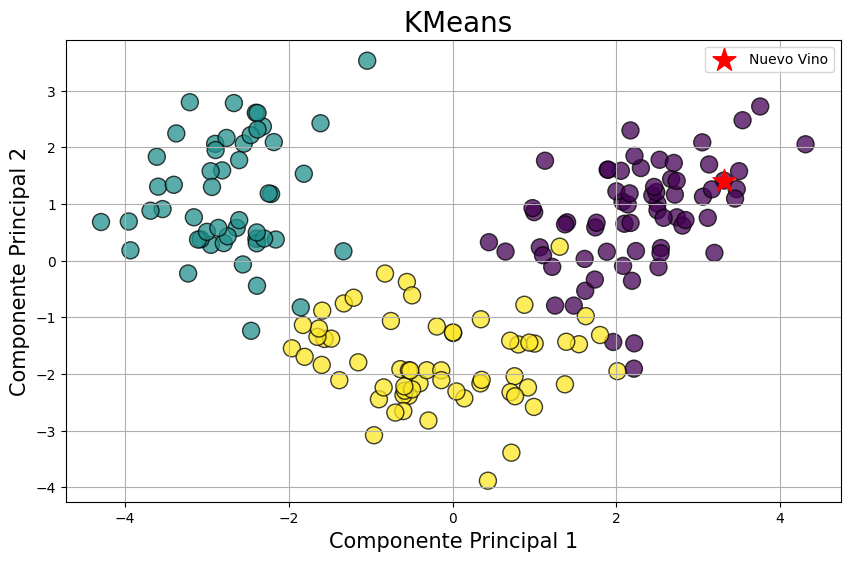

In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 3 clusters porque hay 3 tipos de vino
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)

nuevo_vino= kmeans.predict(nuevo_vino_proyectado)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans.labels_, edgecolors='k', alpha=0.75, s=150)
plt.scatter(nuevo_vino_proyectado[0, 0], nuevo_vino_proyectado[0, 1], c='red', marker='*', s=300, label='Nuevo Vino')
plt.grid(True)
plt.title(" KMeans", fontsize=20)
plt.xlabel("Componente Principal 1", fontsize=15)
plt.ylabel("Componente Principal 2", fontsize=15)
plt.legend()
plt.show()


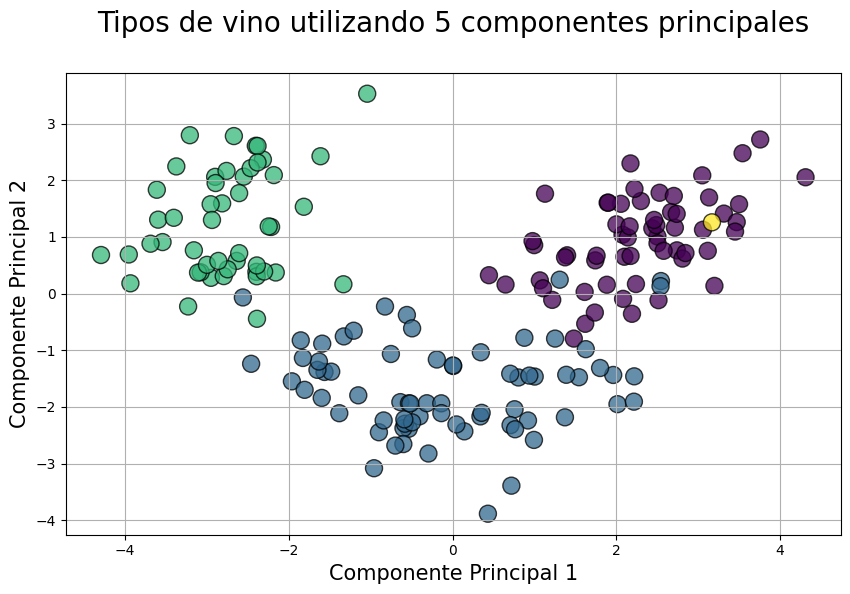

In [143]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(5)])
df_pca['Class'] = y

# Graficar los datos en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando 5 componentes principales\n", fontsize=20)
plt.xlabel("Componente Principal 1", fontsize=15)
plt.ylabel("Componente Principal 2", fontsize=15)
plt.show()

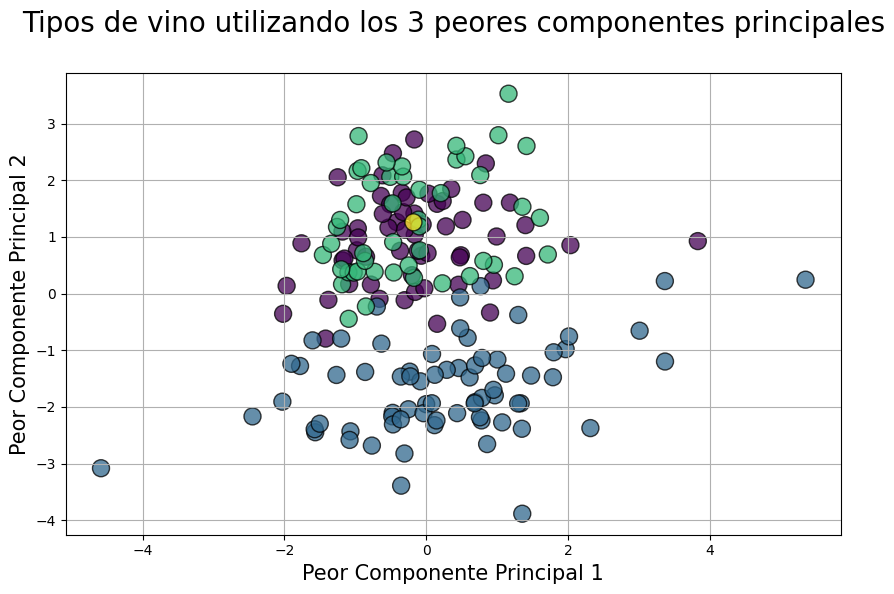

In [150]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Obtener los índices de los 3 peores componentes
peores_indices = np.argsort(pca.explained_variance_ratio_)[:3]

# Seleccionar los 3 peores componentes
X_peores_pca = X_pca[:, peores_indices]

plt.figure(figsize=(10, 6))
plt.scatter(X_peores_pca[:, 0], X_peores_pca[:, 1], c=y, edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 3 peores componentes principales\n", fontsize=20)
plt.xlabel("Peor Componente Principal 1", fontsize=15)
plt.ylabel("Peor Componente Principal 2", fontsize=15)
plt.show()
